<h1>Revenue Prediction Project</h1>

In [165]:
import warnings
warnings.filterwarnings("ignore")

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df = pd.read_csv("./revenue_prediction.csv")
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [169]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [170]:
df.duplicated().sum()

0

In [171]:
df = df.drop("Id", axis = 1)

In [172]:
df

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...
95,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [173]:
from sklearn.preprocessing import LabelEncoder

In [174]:
le = LabelEncoder()
for cols in df.columns:
    if df[cols].dtype == 'object':
        df[cols] = le.fit_transform(df[cols])
        print(df[cols])

0     40
1     14
2     16
3     60
4     68
      ..
95    96
96    47
97    35
98    41
99    55
Name: Name, Length: 100, dtype: int32
0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    1
97    1
98    1
99    0
Name: Franchise, Length: 100, dtype: int32
0     12
1     19
2      5
3     11
4     13
      ..
95    11
96    19
97    19
98    17
99     2
Name: Category, Length: 100, dtype: int32
0     0
1     1
2     4
3     2
4     3
     ..
95    0
96    0
97    1
98    4
99    2
Name: City, Length: 100, dtype: int32


In [175]:
df

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,40,1,12,0,55,5.5,5953753
1,14,0,19,1,72,6.8,7223131
2,16,1,5,4,25,1.9,2555379
3,60,1,11,2,18,2.5,2175511
4,68,1,13,3,48,4.2,4816715
...,...,...,...,...,...,...,...
95,96,0,11,0,19,1.1,1270499
96,47,1,19,0,75,6.3,6412623
97,35,1,19,1,77,6.2,6694797
98,41,1,17,4,25,2.1,2344689


In [176]:
df = df.drop('Name', axis = 1)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Franchise     100 non-null    int32  
 1   Category      100 non-null    int32  
 2   City          100 non-null    int32  
 3   No_Of_Item    100 non-null    int64  
 4   Order_Placed  100 non-null    float64
 5   Revenue       100 non-null    int64  
dtypes: float64(1), int32(3), int64(2)
memory usage: 3.6 KB


In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [179]:
x = df.drop('Revenue', axis = 1)
y = df['Revenue']

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [181]:
from sklearn.linear_model import LinearRegression

In [182]:
l_model = LinearRegression()

In [183]:
l_model.fit(x_train, y_train)

LinearRegression()

In [184]:
y_predict = l_model.predict(x_test)

In [185]:
y_predict

array([6666479.57324263, 5639644.54872308, 3805536.39463166,
       4193324.18078208, 4343130.14047885, 3771286.28284555,
       3975231.17369166, 3538465.19057696, 4008270.62952065,
       6564461.36756485, 5475587.89962776, 3049610.70004873,
       2810473.9006414 , 2279966.85189423, 3582880.67553956,
       4520150.55828419, 5132586.00030909, 1439624.56657968,
       1771028.10021913, 2139029.64016056])

In [186]:
y_test.shape

(20,)

In [187]:
print(np.sqrt(mean_squared_error(y_test, y_predict)))

446366.6680089523


In [188]:
mean_absolute_percentage_error(y_test, y_predict)*100

10.1480343197417

In [189]:
r2_score(y_test, y_predict)*100

86.392877150465

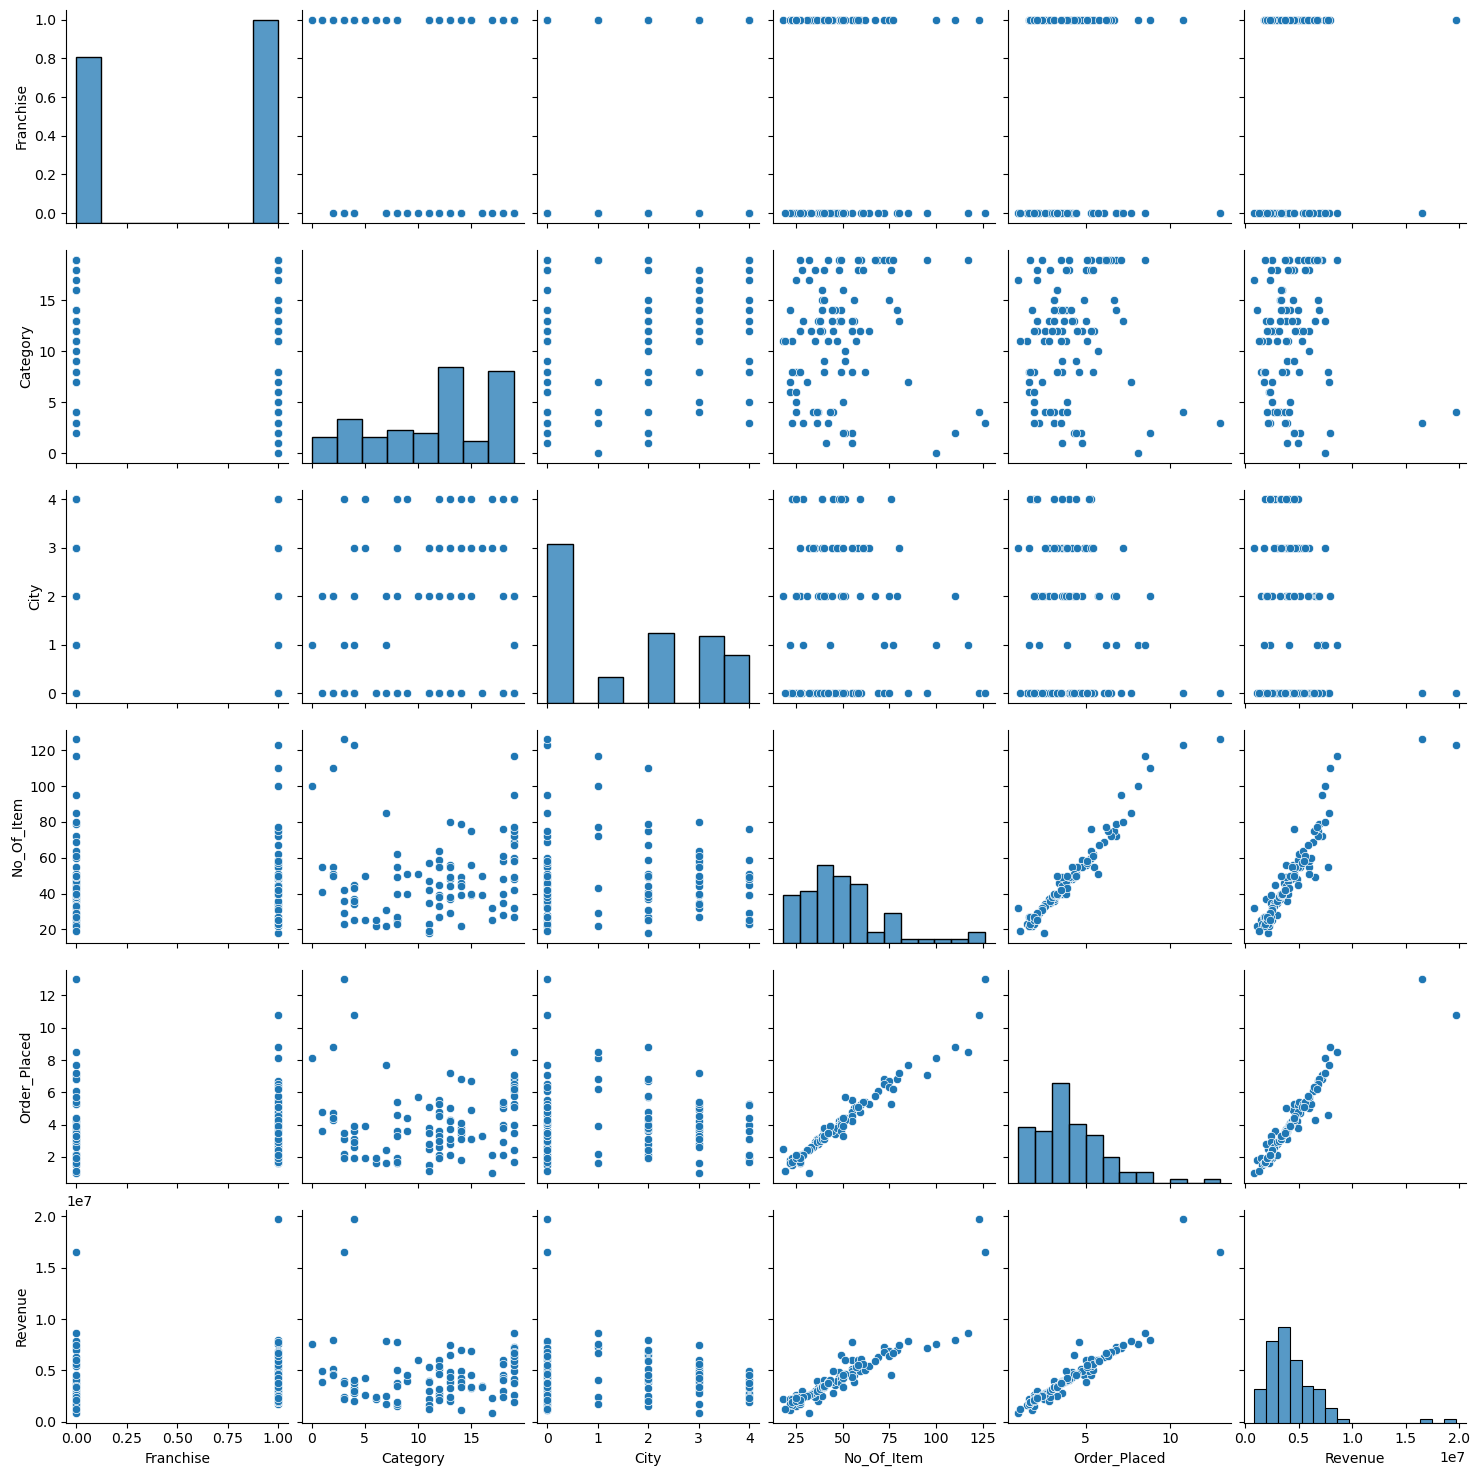

In [190]:
sns.pairplot(df)

In [191]:
from sklearn.tree import DecisionTreeRegressor

In [192]:
dt_model = DecisionTreeRegressor()

In [193]:
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [194]:
y_predct = dt_model.predict(x_test)

In [195]:
y_predct

array([3861370., 6135276., 4066618., 3836721., 4100886., 4052733.,
       4052733., 3600467., 2778621., 3861370., 5906596., 3452382.,
       3273041., 2967425., 2778621., 4100886., 6491607., 1099097.,
       1619683., 2555379.])

In [196]:
y_test

83    5966193
53    5595267
70    3982767
45    3752885
44    4264176
39    3818055
22    4956086
80    3727364
10    3945135
0     5953753
18    4937526
30    2408199
73    3347767
33    2371202
90    3426169
4     4816715
76    4590423
77    1904842
12    2234634
31    2358644
Name: Revenue, dtype: int64

In [198]:
print(np.sqrt(mean_squared_error(y_test, y_predct)))

984669.0476662704


In [200]:
mean_absolute_percentage_error(y_test, y_predct)*100

19.464484533637343

In [201]:
r2_score(y_test, y_predct)*100

33.78393548538923

In [202]:
from sklearn.tree import plot_tree

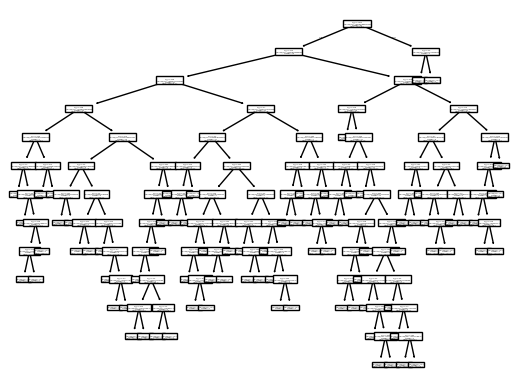

In [204]:
plot_tree(dt_model)
plt.show()

In [205]:
from sklearn.ensemble import RandomForestRegressor

In [209]:
rf_model = RandomForestRegressor(n_estimators = 100)

In [210]:
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [211]:
y_prdct = rf_model.predict(x_test)

In [212]:
print(np.sqrt(mean_squared_error(y_test, y_prdct)))

526065.1805861084


In [213]:
mean_absolute_percentage_error(y_test, y_prdct)*100

11.07851733415427

In [214]:
r2_score(y_test, y_prdct)*100

81.09999550411163

In [215]:
from sklearn.svm import SVR

In [222]:
svr_model = SVR(kernel = 'linear')

In [223]:
svr_model.fit(x_train, y_train)

SVR(kernel='linear')

In [224]:
y_pdt = svr_model.predict(x_test)

In [225]:
print(np.sqrt(mean_squared_error(y_test, y_pdt)))

1196652.2180870604


In [226]:
mean_absolute_percentage_error(y_test, y_pdt)*100

29.77065812134422

In [227]:
r2_score(y_test, y_pdt)*100

2.2045402310614026